In [92]:
import numpy as np
from tabulate import tabulate
from sympy import symbols, expand, lambdify, latex
import matplotlib.pyplot as plt
from tqdm import tqdm

In [2]:
def func(x):
    return 1 / (1 + np.power(x, 2))

def func_p(x):
    return - 2 * x / np.power(1 + np.power(x, 2), 2)

In [52]:
def hermite(xs):
  n = len(xs)
  q = np.zeros((2 * n, 2 * n))
  z = np.zeros(2 * n)
  
  for i in range(n):
    z[2 * i] = xs[i]
    z[2 * i + 1] = xs[i]
    q[2 * i][0] = func(xs[i])
    q[2 * i + 1][0] = func(xs[i])
    q[2 * i + 1][1] = func_p(xs[i])

    if i != 0:
      q[2 * i][1] = (q[2 * i][0] - q[2 * i - 1][0]) / (z[2 * i] - z[2 * i - 1])
  
  for i in range(2, 2 * n):
    for j in range(2, i + 1):
      q[i][j] = (q[i][j - 1] - q[i - 1][j - 1]) / (z[i] - z[i - j])

  print(z)

  return q

In [53]:
x_s = np.linspace(-5, 5, 11)
x_s

array([-5., -4., -3., -2., -1.,  0.,  1.,  2.,  3.,  4.,  5.])

In [54]:
print(tabulate(hermite(x_s)))

[-5. -5. -4. -4. -3. -3. -2. -2. -1. -1.  0.  0.  1.  1.  2.  2.  3.  3.
  4.  4.  5.  5.]
---------  ----------  -----------  -----------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  -----------  -
0.0384615   0           0            0            0             0             0             0             0             0             0             0             0             0             0             0             0             0             0             0            0            0
0.0384615   0.0147929   0            0            0             0             0             0             0             0             0             0             0             0             0             0             0             0             0             0            0            0
0.0588235   0.020362    0.00556909   0       

In [79]:
coeffs = hermite(x_s).diagonal()
coeffs

[-5. -5. -4. -4. -3. -3. -2. -2. -1. -1.  0.  0.  1.  1.  2.  2.  3.  3.
  4.  4.  5.  5.]


array([ 3.84615385e-02,  1.47928994e-02,  5.56909154e-03,  1.75057841e-03,
        6.68495731e-04,  2.26039598e-04,  9.23404517e-05,  2.86644418e-05,
       -3.17356319e-06, -1.75057841e-05, -1.43322209e-05,  1.75057841e-05,
       -1.58678160e-06, -7.16611044e-06,  4.61702258e-06, -2.26039598e-06,
        6.68495731e-07, -1.75057841e-07,  3.27593620e-08, -5.11865031e-09,
        5.11865031e-10,  0.00000000e+00])

In [80]:
coeffs = coeffs.tolist()
coeffs

[0.038461538461538464,
 0.014792899408284023,
 0.0055690915419422185,
 0.0017505784074855202,
 0.0006684957310456353,
 0.00022603959787882884,
 9.234045166970663e-05,
 2.866444175999394e-05,
 -3.1735631948554547e-06,
 -1.7505784074855707e-05,
 -1.4332220879998214e-05,
 1.7505784074855114e-05,
 -1.5867815974283903e-06,
 -7.166110439999179e-06,
 4.617022583485185e-06,
 -2.2603959787883124e-06,
 6.684957310456377e-07,
 -1.7505784074855137e-07,
 3.275936201142482e-08,
 -5.118650314285128e-09,
 5.118650314285128e-10,
 0.0]

In [83]:
p = np.poly1d((coeffs[::-1]))
print(p)

           20             19             18             17
5.119e-10 x  - 5.119e-09 x  + 3.276e-08 x  - 1.751e-07 x 
              16            15             14             13
 + 6.685e-07 x  - 2.26e-06 x  + 4.617e-06 x  - 7.166e-06 x 
              12             11             10             9
 - 1.587e-06 x  + 1.751e-05 x  - 1.433e-05 x  - 1.751e-05 x
              8             7             6            5             4
 - 3.174e-06 x + 2.866e-05 x + 9.234e-05 x + 0.000226 x + 0.0006685 x
             3            2
 + 0.001751 x + 0.005569 x + 0.01479 x + 0.03846


In [36]:
np.polyval(p, [0.2, 0.3])

array([0.04165803, 0.04345393])

In [45]:
x = symbols('x')

In [65]:
z = np.array([-5, -5, -4, -4, -3, -3, -2, -2, -1, -1,  0,  0,  1,  1,  2,  2,  3,  3,4,  4,  5,  5,])

In [84]:
expressions = []
for i in range(len(z)):
  expr = coeffs[i]
  for j in range(i): 
    print(f"({x} - {z[j]})", end=" * ")
    expr *= x - z[j]
  expressions.append(expr)
  print()


(x - -5) * 
(x - -5) * (x - -5) * 
(x - -5) * (x - -5) * (x - -4) * 
(x - -5) * (x - -5) * (x - -4) * (x - -4) * 
(x - -5) * (x - -5) * (x - -4) * (x - -4) * (x - -3) * 
(x - -5) * (x - -5) * (x - -4) * (x - -4) * (x - -3) * (x - -3) * 
(x - -5) * (x - -5) * (x - -4) * (x - -4) * (x - -3) * (x - -3) * (x - -2) * 
(x - -5) * (x - -5) * (x - -4) * (x - -4) * (x - -3) * (x - -3) * (x - -2) * (x - -2) * 
(x - -5) * (x - -5) * (x - -4) * (x - -4) * (x - -3) * (x - -3) * (x - -2) * (x - -2) * (x - -1) * 
(x - -5) * (x - -5) * (x - -4) * (x - -4) * (x - -3) * (x - -3) * (x - -2) * (x - -2) * (x - -1) * (x - -1) * 
(x - -5) * (x - -5) * (x - -4) * (x - -4) * (x - -3) * (x - -3) * (x - -2) * (x - -2) * (x - -1) * (x - -1) * (x - 0) * 
(x - -5) * (x - -5) * (x - -4) * (x - -4) * (x - -3) * (x - -3) * (x - -2) * (x - -2) * (x - -1) * (x - -1) * (x - 0) * (x - 0) * 
(x - -5) * (x - -5) * (x - -4) * (x - -4) * (x - -3) * (x - -3) * (x - -2) * (x - -2) * (x - -1) * (x - -1) * (x - 0) * (x - 0) * (x

In [85]:
expressions[0]

0.038461538461538464

In [95]:
expressions

[0.038461538461538464,
 0.014792899408284*x + 0.0739644970414201,
 (0.00556909154194222*x + 0.0278454577097111)*(x + 5),
 (0.00175057840748552*x + 0.0087528920374276)*(x + 4)*(x + 5),
 (0.000668495731045635*x + 0.00334247865522818)*(x + 4)**2*(x + 5),
 (0.000226039597878829*x + 0.00113019798939414)*(x + 3)*(x + 4)**2*(x + 5),
 (9.23404516697066e-5*x + 0.000461702258348533)*(x + 3)**2*(x + 4)**2*(x + 5),
 (2.86644417599939e-5*x + 0.00014332220879997)*(x + 2)*(x + 3)**2*(x + 4)**2*(x + 5),
 (-3.17356319485545e-6*x - 1.58678159742773e-5)*(x + 2)**2*(x + 3)**2*(x + 4)**2*(x + 5),
 (-1.75057840748557e-5*x - 8.75289203742785e-5)*(x + 1)*(x + 2)**2*(x + 3)**2*(x + 4)**2*(x + 5),
 (-1.43322208799982e-5*x - 7.16611043999911e-5)*(x + 1)**2*(x + 2)**2*(x + 3)**2*(x + 4)**2*(x + 5),
 x*(1.75057840748551e-5*x + 8.75289203742756e-5)*(x + 1)**2*(x + 2)**2*(x + 3)**2*(x + 4)**2*(x + 5),
 x**2*(-1.58678159742839e-6*x - 7.93390798714195e-6)*(x + 1)**2*(x + 2)**2*(x + 3)**2*(x + 4)**2*(x + 5),
 x**2*(-7.

In [96]:
equation = expand(sum(expressions))
equation

5.11865031428513e-10*x**20 - 5.68170184885649e-8*x**18 + 2.65248459286255e-6*x**16 - 6.8079072910055e-5*x**14 + 1.76182853028894e-19*x**13 + 0.00105578970537049*x**12 + 4.33680868994202e-19*x**11 - 0.0102636427386827*x**10 - 1.73472347597681e-18*x**9 + 0.0630632992772465*x**8 - 2.68882138776405e-17*x**7 - 0.243093622161708*x**6 - 4.8919202022546e-16*x**5 + 0.583163325894228*x**4 - 4.79217360238593e-16*x**3 - 0.893859667082984*x**2 + 5.55111512312578e-17*x + 1.0

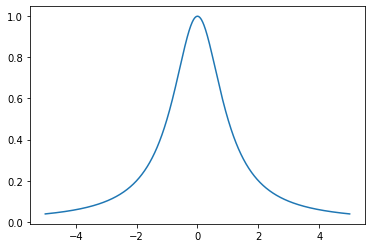

In [97]:
xs = np.linspace(-5, 5, 1000)

plt.plot(xs, func(xs))

100%|██████████| 1000/1000 [00:07<00:00, 132.34it/s]


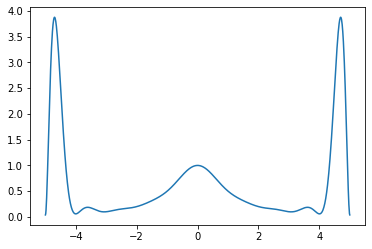

In [98]:
y_s = [equation.subs(x, i) for i in tqdm(xs)]
plt.plot(xs, y_s)